# mBuild Tutorial 06: Setting Up Bulk Systems

This tutorial demostrates several ways in which to create bulk systems using mBuild.

As in the prior tutorials, we need to first import mbuild (here as `mb`), import the visualization routines (as `visualize`), and apply the matplotlib command to redirect plots to the notebook window.

In [1]:
%matplotlib notebook
from visualize import visualize
import mbuild as mb

Here, we will import the `Alkane` class that is part of mBuild, to create a simple hexane molecule.  Note, this class is similar to the  Alkane class constructed in the prior tutorials. 

<IPython.core.display.Javascript object>


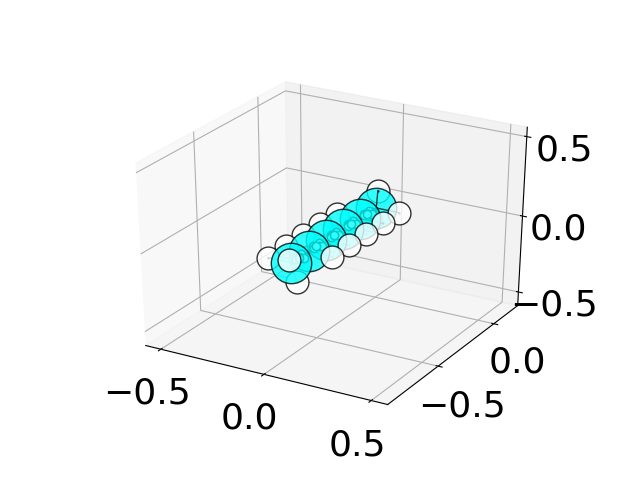

In [2]:
from mbuild.examples import Alkane

hexane = Alkane(6)

visualize(hexane)

To create a simple system, one could manually (or via a loop) duplicate the hexane molecule. 

<IPython.core.display.Javascript object>


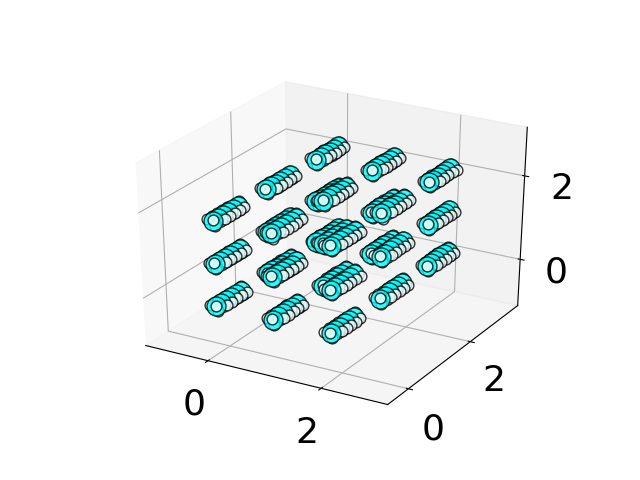

In [3]:
#first shift the hexane such that its center of mass is at the origin
hexane.translate(-(hexane.center))

box_of_hexanes = mb.Compound()

#place items on a grid via a simple loop
for i in range(0,3):
    for j in range(0,3):
        for k in range(0,3):
            temp_hexane = mb.clone(hexane)
            pos = [i, j*1.5, k]
            temp_hexane.translate_to(pos)
            box_of_hexanes.add(temp_hexane)

visualize(box_of_hexanes)

Alternatively, one can use a one of the mBuild pattern functions to define a grid of points.  

<IPython.core.display.Javascript object>


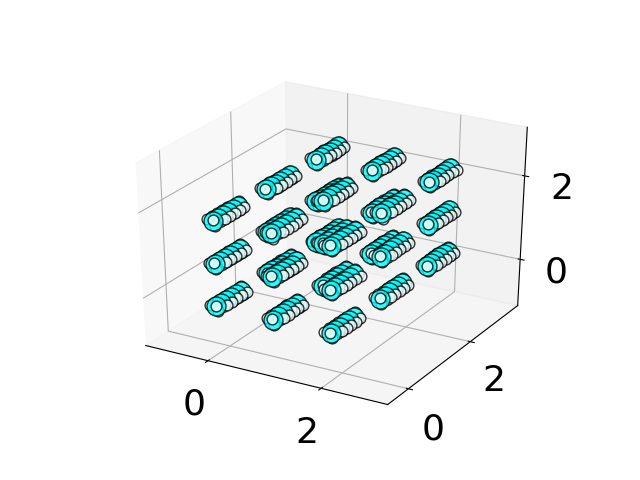

In [4]:
box_of_hexanes = mb.Compound()

grid3d = mb.Grid3DPattern(3, 3, 3)

#the pattern is defined from 0 to 1
#thus we will scale it by 3.0 to be the same as above
grid3d.scale(3.0)
for position in grid3d:
    temp_hexane = mb.clone(hexane)
    #scale up the spacing in the y direction
    position[1] = position[1]*1.5
    temp_hexane.translate_to(position)
    box_of_hexanes.add(temp_hexane)

visualize(box_of_hexanes)

We can also use the spin command to provide a uniform tilt to the molecules or a random orientation for each molecule.  

<IPython.core.display.Javascript object>


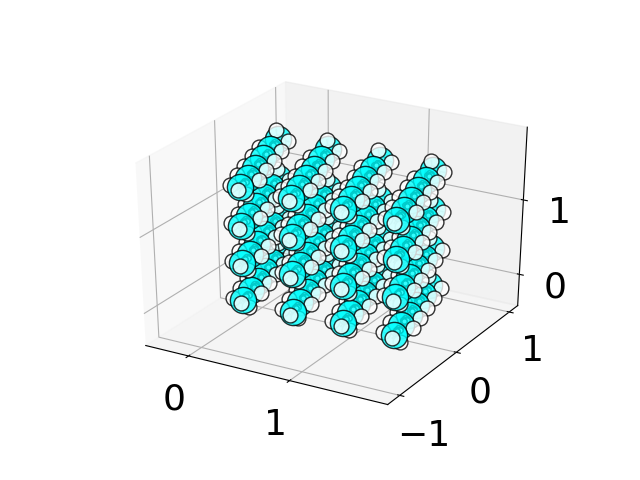

In [5]:
box_of_hexanes = mb.Compound()

grid3d = mb.Grid3DPattern(4, 1, 4)

grid3d.scale(2.0)
for position in grid3d:
    temp_hexane = mb.clone(hexane)
    temp_hexane.spin(0.5, around=[1,0,0])
    temp_hexane.translate_to(position)
    box_of_hexanes.add(temp_hexane)

visualize(box_of_hexanes)

<IPython.core.display.Javascript object>


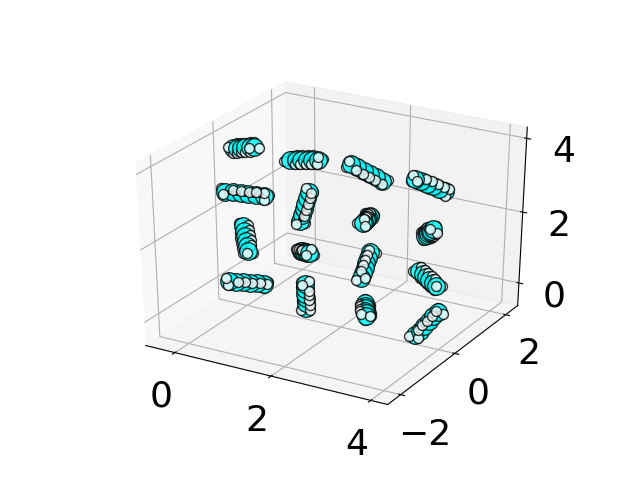

In [6]:
import random
from numpy import pi
box_of_hexanes = mb.Compound()

grid3d = mb.Grid3DPattern(4, 1, 4)

rnd = random.Random()
rnd.seed(123)
    
grid3d.scale(5.0)
for position in grid3d:
    temp_hexane = mb.clone(hexane)
    #randomly rotate around each of the axes
    temp_hexane.spin(rnd.uniform(0, 2 * pi), around=[1,0,0])
    temp_hexane.spin(rnd.uniform(0, 2 * pi), around=[0,1,0])
    temp_hexane.spin(rnd.uniform(0, 2 * pi), around=[0,0,1])
    temp_hexane.translate_to(position)
    box_of_hexanes.add(temp_hexane)

visualize(box_of_hexanes)

### Using Packmol

In cases where it may be desirable to create randomized initial configurations, especially one of higher density, mBuild can interface with [packmol](http://www.ime.unicamp.br/~martinez/packmol) using the `fill_box` routine.  Here, first define a box (again, note, dimensions are in nanometers) and use the `fill_box` command to create `n` copies of our hexane molecule (here set to be 10).

<IPython.core.display.Javascript object>


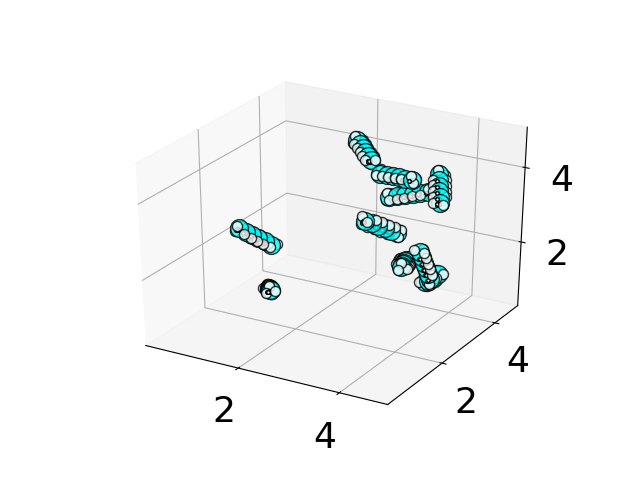

In [7]:
box = mb.Box(lengths=[5, 5, 5])

box_of_hexanes = mb.fill_box(compound=hexane, n_compounds=10, box=box)
visualize(box_of_hexanes)

To create a system with more than a single type of molecule, we can use the solvate command. To additionally demonstrate functionality, we will create a perfluorohexane molecule, whereby hydrogen atoms are swapped with fluorine.

<IPython.core.display.Javascript object>


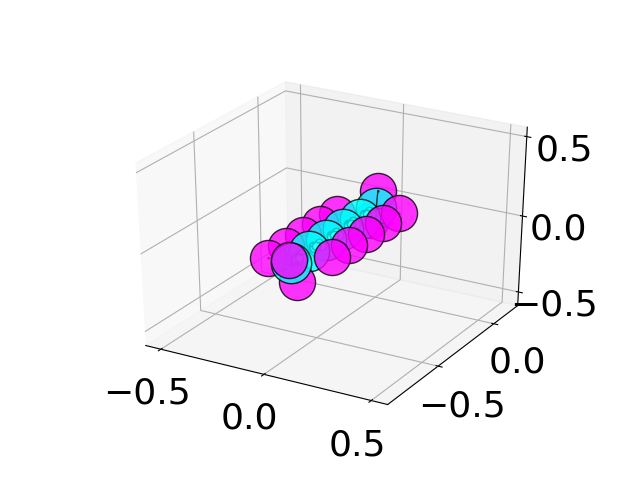

In [8]:
perfluorohexane = Alkane(6)
for particle in perfluorohexane.particles():
    if particle.name == 'H':
        particle.name = 'F'

visualize(perfluorohexane)

To solvate, we can take our previously defined system (`box_of_hexanes`) and pass perfluorohexane as our solvent. 

<IPython.core.display.Javascript object>


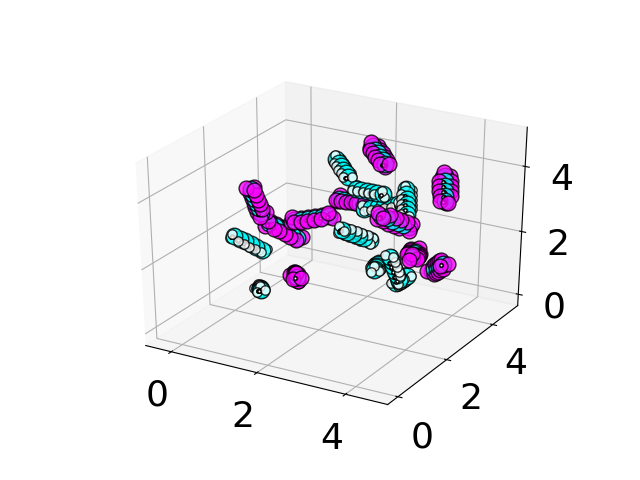

In [9]:
box_of_chains = mb.solvate(solute=box_of_hexanes, solvent=perfluorohexane, n_solvent=10, box=box)
visualize(box_of_chains)

Alternatively, the `fill_box` routine can take an array of `Compounds` (note, `n_compounds` must also be an array of corresponding length). 

<IPython.core.display.Javascript object>


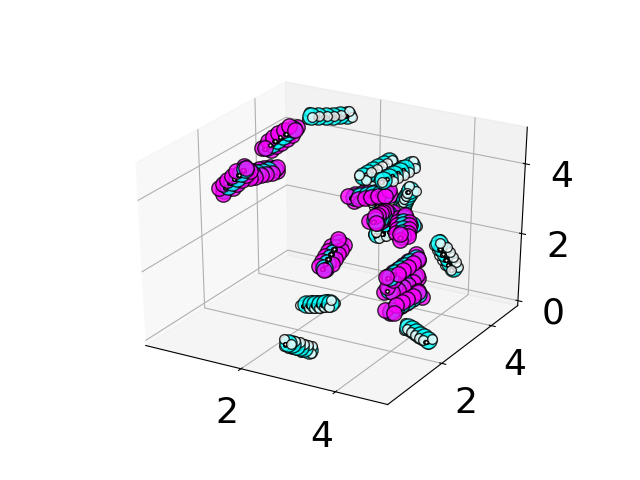

In [10]:
box_of_chains = mb.fill_box(compound=[hexane, perfluorohexane], n_compounds=[10, 10], box=box)
visualize(box_of_chains)